# Knapsack results - pure RQGA (saci2022)

Thanks to https://regex101.com/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from functools import reduce
import math
import ast

In [2]:
from collections import namedtuple
ItemConfiguration = namedtuple('Item', 'm,v')

In [3]:
NO_OF_QUBITS_FITNESS = 8
NO_OF_QUBITS_INDIVIDUAL = 4
POPULATION_SIZE = 2**NO_OF_QUBITS_INDIVIDUAL
NO_OF_MAX_GROVER_ITERATIONS = int(math.sqrt(2**NO_OF_QUBITS_FITNESS-1))
BEST_SOLUTION=18

In [4]:
MAX_ALLOWED_MASS = 10
TOTAL_VALUE = 22
items = [ItemConfiguration(3, 3),ItemConfiguration(2, 5),ItemConfiguration(4, 10),ItemConfiguration(7, 4)]

In [5]:
def fitness_function(mass,value):
    return int(value - (TOTAL_VALUE+1)*divmod(mass,MAX_ALLOWED_MASS)[0])

def calculate_individual_fitness(individual_bin_configuration):
    calculated_mass = 0
    calculated_value = 0
    for i in range(0, NO_OF_QUBITS_INDIVIDUAL):
        if individual_bin_configuration[i]==1:
            calculated_mass += items[i].m
            calculated_value += items[i].v
    fitness_value = fitness_function(calculated_mass,calculated_value)
    if calculated_mass < MAX_ALLOWED_MASS:
        return True, fitness_value
    else:
        return False,fitness_value

def knapSack(max_weight, items,no_of_items):
             #weight_item, value_item, no_of_items):
  
    # Base Case
    if no_of_items == 0 or max_weight == 0 :
        return 0
  
    # If weight of the nth item is more than Knapsack of capacity
    # W, then this item cannot be included in the optimal solution
    if (items[no_of_items-1].m > max_weight):
        return knapSack(max_weight, items, no_of_items-1)
  
    # return the maximum of two cases:
    # (1) nth item included
    # (2) not included
    else:
        return max(items[no_of_items-1].v + knapSack(max_weight-items[no_of_items-1].m, items, no_of_items-1),
                   knapSack(max_weight, items, no_of_items-1))    
def string_to_list(string):
    return_list = []
    for i in string:
        if i != " " and i !=",":
            return_list.append(int(i))
    return return_list     
 

def calculate_weight(individual_bin_configuration):
    calculated_mass = 0
    for i in range(0, NO_OF_QUBITS_INDIVIDUAL):
        if individual_bin_configuration[i]==1:
            calculated_mass += items[i].m
    return calculated_mass

In [7]:
def plot_me(graph_nx,figure_title,color_pairs, colored=False):
    if colored == True:
        colors = [((0,0),'lightcoral'),((0,1),'skyblue'),((1,0),'mediumseagreen')]
        color_list = []
        for pair in color_pairs:
            for entry in colors:
                if pair==entry[0]:
                    color_list.append(entry[1])
        nx.draw_networkx(graph_nx, with_labels=True, node_color=color_list,node_size=1500,width = 7,font_weight='bold',font_size=14,edgecolors="black",linewidths =2.0)
    else:
        color_list = ['skyblue']
        nx.draw_networkx(graph_nx, with_labels=True,node_color= color_list,node_size=1500,width = 7,font_weight='bold',font_size=14,edgecolors="black",linewidths =2.0)
    plt.title(figure_title)
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([2*x for x in axis.get_xlim()])
    axis.set_ylim([2*y for y in axis.get_ylim()])
    plt.tight_layout()
    plt.draw()
    
def plot_results(measurements,filename,title):
    generations_list = []
    valid_solutions_list =[]
    best_solutions_list = []
    best_solution = []
    generation=0

    no_of_valid_solutions = 0
    best_solution_count = 0
    for entry in measurements:
      generation+=1
      solution = string_to_list(entry[0]) [6:]
      valid,fitness_value = calculate_individual_fitness(solution)
            
      if valid == True:
          no_of_valid_solutions +=1
      if valid == True and fitness_value == knapSack(MAX_ALLOWED_MASS, items, len(items)):
          best_solution.append(solution)
          best_solution_count += 1 
      generations_list.append(generation)
      valid_solutions_list.append(no_of_valid_solutions)
      best_solutions_list.append(best_solution_count)
    fig, ax = plt.subplots()
    ax.plot(generations_list, valid_solutions_list,'ko--', label="Number of Valid Solutions")
    ax.plot(generations_list, best_solutions_list,'k^-', label="Number of Best Solutions")
    ax.legend()
    ax.grid()
    ax.set_xlabel("Number of RQGA Generations",fontsize=16)
    ax.set_ylabel("Number of solutions",fontsize=16)
    plt.title(title)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "14"
    plt.xticks(generations_list)
    plt.show()
    #fig.savefig(filename)
    return best_solution
def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black','color':'grey'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)

In [8]:
EXTRACT_MH_GENERATIONS_REGEX = r"Best individual found after (\d+)"

EXTRACT_SOLUTIONS_REGEX = r"\[((\([\d]+(,\s)[\d]+\))+((,\s)|(\])))+"

EXTRACT_TUPLES_REGEX = r"([\d]+), ([\d]+)"

In [9]:
def parse_number_of_generations(regex_pattern, text):
  pattern = compile(regex_pattern)
  generations = []
  for match in pattern.finditer(text):
    generations.append(int(match.group(1)))
  
  return sum(generations)//len(generations)

def extract_tuples(regex_pattern, line):
  matches = re.finditer(EXTRACT_TUPLES_REGEX, line, re.MULTILINE)
  solutions = []
  
  for matchNum, match in enumerate(matches, start=1):
    match_value = []
    
    for groupNum in range(0, len(match.groups())):
        groupNum = groupNum + 1
        match_value.append(match.group(groupNum))
    # print (list(match_value))
    solutions.append((int(match_value[0]),int(match_value[1])))
  return solutions

def parse_solutions(regex_pattern,text):
  matches = re.finditer(regex_pattern, text, re.MULTILINE)
  lines = []
  for matchNum, match in enumerate(matches, start=1):
    lines.append(match.group())
  return lines
  

In [10]:
def no_of_solutions(measurements):
    generation=0

    solutions=[]
    for entry in measurements:
        no_of_valid_solutions = 0
        no_of_best_solutions = 0
        if entry[1]==BEST_SOLUTION:
          no_of_best_solutions+=1
        elif entry[1]>0:
          no_of_valid_solutions+=1
        solutions.append((entry[0],no_of_valid_solutions,no_of_best_solutions))
    return solutions

# Results Pure Knapsack saci 2022

In [11]:
filename = "rqga_pure_knapsack_results.txt"

filtered_solutions = []

content = ""
with open(filename) as f:
    content = f.readlines()
    log=""
    log = log.join(content)  
    
    lines = parse_solutions(EXTRACT_SOLUTIONS_REGEX,log)
    # print(lines)
    for line in lines:
        measurement=extract_tuples(EXTRACT_TUPLES_REGEX, line)
        #print(measurement)
        #(generation    Valid    Best)
        best_solution = no_of_solutions(measurement)
        #print(best_solution)
        for solution in best_solution:
          if solution[2]!=0 or solution[1]!=0:
            filtered_solutions.append(solution)

final_solutions = []
for i in range(1,11):
    number_of_valid_solutions = reduce(lambda x,y: x+y[1] if y[0]==i else x+0, filtered_solutions, 0)
  
    number_of_best_solutions = reduce(lambda x,y: x+y[2] if y[0]==i else x+0, filtered_solutions, 0)
    final_solutions.append((i,number_of_valid_solutions,number_of_best_solutions))
print(f"{final_solutions}")


[(1, 79, 4), (2, 73, 2), (3, 69, 5), (4, 67, 2), (5, 53, 5), (6, 51, 5), (7, 52, 5), (8, 0, 0), (9, 0, 0), (10, 0, 0)]


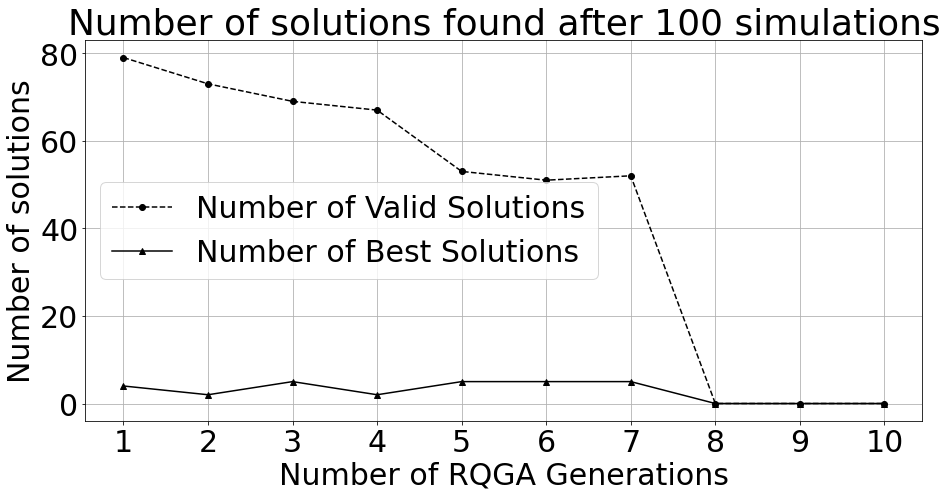

In [105]:
generations_list = list(map(lambda x: x[0], final_solutions))
valid_solutions_list = list(map(lambda x: x[1], final_solutions))
best_solutions_list = list(map(lambda x: x[2], final_solutions))
title = "Number of solutions found after 100 simulations"
plt.rcParams["figure.figsize"] = (15, 7)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "30"
fig, ax = plt.subplots()
ax.plot(generations_list, valid_solutions_list,'ko--', label="Number of Valid Solutions")
ax.plot(generations_list, best_solutions_list,'k^-', label="Number of Best Solutions")
ax.legend()
ax.grid()
ax.set_xlabel("Number of RQGA Generations",fontsize=30)
ax.set_ylabel("Number of solutions",fontsize=30)
plt.title(title)
plt.xticks(generations_list)
plt.show()
fig.savefig("/content/drive/MyDrive/Colab Notebooks/results/results_knapsack_pure_solutions.pdf")